In [54]:
import json
import os
from typing import List, Dict

import matplotlib.pyplot as plt

model_ids: List[str] = [
    'SimpleNeuralNet2021_12_02_11_51_54_168646',
    'SimpleNeuralNet2021_12_02_11_11_55_435483',
    'LinearRegression2021_12_02_12_25_39_613388'
]
labels = ['NeuralNet (1 Layer)', 'NeuralNet (2 Layers)', 'Linear Regression']
assert len(model_ids) == len(labels)

experiments = []
for model_id in model_ids:
    with open(os.path.join('..', 'experiments', 'archive', model_id + '.json')) as file:
        experiment_data = json.load(file)
        experiments.append(experiment_data)
        print(experiment_data)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [55]:
class ModelComparison:

    def __init__(self, date_of_comparison):
        self.date_of_comparison = date_of_comparison
        self.expected = None
        self.model_predictions: Dict[str, List[float]] = dict()

    def add_model_predictions(self, experiment_id: str, predictions: List[float]):
        self.model_predictions[experiment_id] = predictions

    def serialize(self):
        return self.__dict__


date_to_model_comparison: Dict[str, ModelComparison] = dict()
for experiment in experiments:
    ex_id = experiment['experimentName']
    experiment_results_per_hour = experiment['evaluation']['expected_predicted_comparison']
    for hourly_results in experiment_results_per_hour:
        date = hourly_results['date']
        if not date in date_to_model_comparison:
            date_to_model_comparison[date] = ModelComparison(date)
        date_to_model_comparison[date].add_model_predictions(ex_id, hourly_results['predicted'])
        date_to_model_comparison[date].expected = hourly_results['expected']

In [56]:
print(date_to_model_comparison)


def save_as_file():
    result = {
        'model_ids': model_ids,
        'elements': [comparison.serialize() for comparison in date_to_model_comparison.values()]
    }

    file_path = os.path.join('comparison.json')

    with open(file_path, 'w') as fp:
        json.dump(result, fp)
        fp.close()


save_as_file()

{'2018-01-08 00:00:00+00:00': <__main__.ModelComparison object at 0x0000026504CCDFD0>, '2018-01-08 01:00:00+00:00': <__main__.ModelComparison object at 0x0000026504CCDF40>, '2018-01-08 02:00:00+00:00': <__main__.ModelComparison object at 0x0000026504CCDE80>, '2018-01-08 03:00:00+00:00': <__main__.ModelComparison object at 0x0000026504CCDE20>, '2018-01-08 04:00:00+00:00': <__main__.ModelComparison object at 0x0000026504CCDD90>, '2018-01-08 05:00:00+00:00': <__main__.ModelComparison object at 0x0000026504CCDD30>, '2018-01-08 06:00:00+00:00': <__main__.ModelComparison object at 0x0000026504CCDC40>, '2018-01-08 07:00:00+00:00': <__main__.ModelComparison object at 0x0000026504CCDBE0>, '2018-01-08 08:00:00+00:00': <__main__.ModelComparison object at 0x0000026504CCDB80>, '2018-01-08 09:00:00+00:00': <__main__.ModelComparison object at 0x0000026504CCDB50>, '2018-01-08 10:00:00+00:00': <__main__.ModelComparison object at 0x0000026504CCDB20>, '2018-01-08 11:00:00+00:00': <__main__.ModelCompariso

3 8568
[[5515.15380859375, 5215.4501953125, 5225.37255859375, 5417.4775390625, 5870.0029296875, 6625.10302734375, 7581.28076171875, 8406.271484375, 8900.6630859375, 9141.068359375, 9352.8388671875, 9435.4697265625, 9361.396484375, 9130.8603515625, 8830.828125, 8698.3447265625, 8881.1484375, 9032.0478515625, 8807.048828125, 8373.6123046875, 7989.7197265625, 7728.484375, 7171.201171875, 6611.267578125, 6167.646484375, 6032.0234375, 6082.216796875, 6265.099609375, 6553.00732421875, 7331.759765625, 8308.6240234375, 8934.5693359375, 9203.3330078125, 9248.8251953125, 9329.7490234375, 9222.9033203125, 8970.6279296875, 8816.05078125, 8844.3056640625, 8753.337890625, 8903.6181640625, 8987.0166015625, 8867.2841796875, 8437.771484375, 8044.2783203125, 7777.26318359375, 7176.68212890625, 6601.0634765625, 6105.71630859375, 6017.54296875, 6009.283203125, 6162.12939453125, 6490.5927734375, 7175.66259765625, 8176.76025390625, 8790.9306640625, 8985.1806640625, 9118.658203125, 9147.99609375, 9046.790039

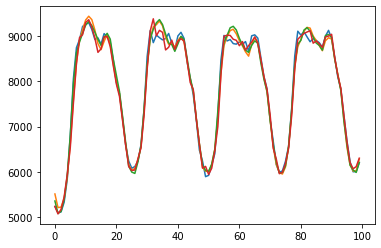

In [57]:
def plot_comparison_by_prediction_horizon(prediction_horizon_length: int, start_index: int, window_size: int):
    l = sorted(date_to_model_comparison.values(), key=lambda c: c.date_of_comparison)
    expected = [e.expected[prediction_horizon_length] for e in l]
    plt.plot(expected[start_index:start_index + window_size])

    predictions = [[] for _ in range(0, len(experiments))]
    for e in l:
        for i, p in enumerate(model_ids):
            predictions[i].append(e.model_predictions[p][prediction_horizon_length])
    for p in predictions:
        plt.plot(p[start_index:start_index + window_size])
    print(len(predictions), len(predictions[0]))
    print(predictions)
    plt.show()


plot_comparison_by_prediction_horizon(0, 0, 100)